In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [3]:
data = pd.read_csv("globalterrorismdb_0718dist.csv",encoding='latin1')
data.head()


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [4]:
data.columns.values


array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [5]:
data.rename(columns={'iyear':'Year','imonth':'Month','iday':"day",'gname':'Group','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City','latitude':'latitude',
    'longitude':'longitude','summary':'summary','attacktype1_txt':'Attacktype','targtype1_txt':'Targettype','weaptype1_txt':'Weapon','nkill':'kill',
     'nwound':'Wound'},inplace=True)


In [6]:
data = data[['Year','Month','day','Country','State','Region','City','latitude','longitude',"Attacktype",'kill',
               'Wound','target1','summary','Group','Targettype','Weapon','motive']]


In [7]:
data.head()


,Year,Month,day,Country,State,Region,City,latitude,longitude,Attacktype,kill,Wound,target1,summary,Group,Targettype,Weapon,motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [8]:
data.shape


(14259, 18)

In [9]:
data.isnull().sum()


Year              0
Month             0
day               0
Country           0
State            64
Region            0
City              1
latitude        487
longitude       487
Attacktype        1
kill           2084
Wound          3467
target1         143
summary       13346
Group             1
Targettype        1
Weapon            1
motive        13612
dtype: int64

In [10]:
data['Wound'] = data['Wound'].fillna(0)
data['kill'] = data['kill'].fillna(0)


In [11]:
data['Casualities'] = data['kill'] + data['Wound']


In [12]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14259 entries, 0 to 14258
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         14259 non-null  int64  
 1   Month        14259 non-null  int64  
 2   day          14259 non-null  int64  
 3   Country      14259 non-null  object 
 4   State        14195 non-null  object 
 5   Region       14259 non-null  object 
 6   City         14258 non-null  object 
 7   latitude     13772 non-null  float64
 8   longitude    13772 non-null  float64
 9   Attacktype   14258 non-null  object 
 10  kill         14259 non-null  float64
 11  Wound        14259 non-null  float64
 12  target1      14116 non-null  object 
 13  summary      913 non-null    object 
 14  Group        14258 non-null  object 
 15  Targettype   14258 non-null  object 
 16  Weapon       14258 non-null  object 
 17  motive       647 non-null    object 
 18  Casualities  14259 non-null  float64
dtypes: f

In [13]:
data.describe()


,Year,Month,day,latitude,longitude,kill,Wound,Casualities
count,14259.000000,14259.000000,14259.000000,13772.000000,13772.000000,14259.000000,14259.000000,14259.000000
mean,1977.372537,6.181079,15.198261,29.405349,-25.804561,1.024546,0.948874,1.973420
std,3.143381,3.360118,8.980147,22.209016,55.534477,6.028242,6.657428,9.649122
min,1970.000000,0.000000,0.000000,-45.867889,-157.818968,0.000000,0.000000,0.000000
25%,1976.000000,3.000000,7.000000,13.743611,-80.214195,0.000000,0.000000,0.000000
50%,1978.000000,6.000000,15.000000,37.874043,-5.956210,0.000000,0.000000,0.000000
75%,1980.000000,9.000000,23.000000,43.768732,11.256901,1.000000,0.000000,1.000000
max,1986.000000,12.000000,31.000000,64.837778,172.636225,422.000000,285.000000,422.000000


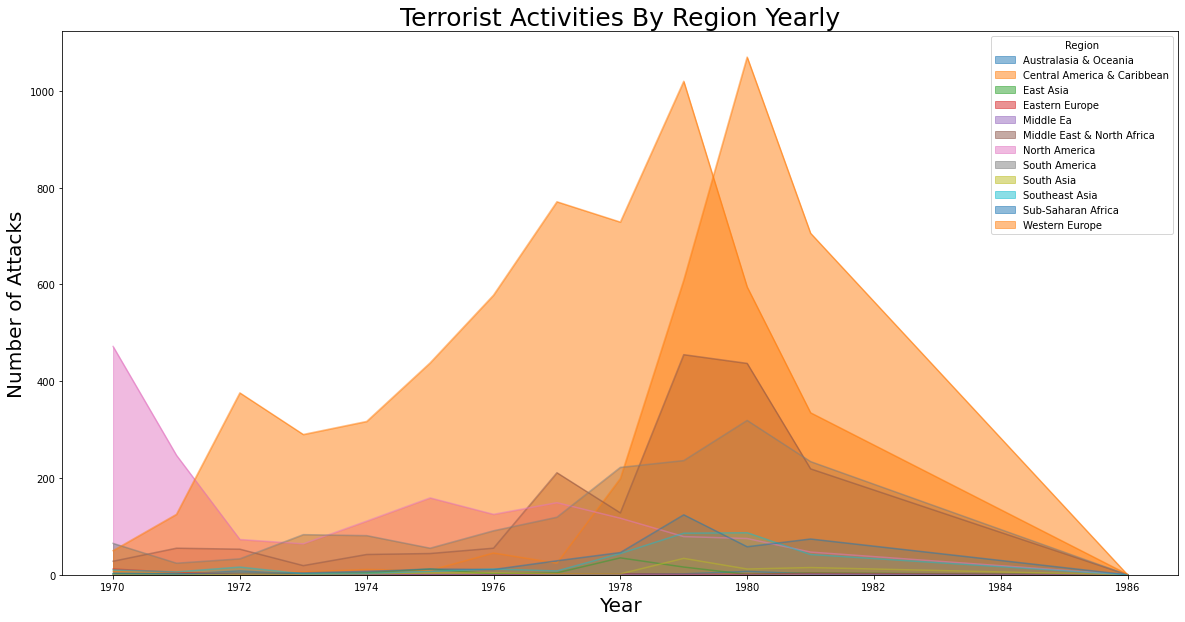

In [16]:
pd.crosstab(data.Year, data.Region).plot(kind='area',stacked=False,figsize=(20,10))
plt.title('Terrorist Activities By Region Yearly',fontsize=25)
plt.ylabel('Number of Attacks',fontsize=20)
plt.xlabel("Year",fontsize=20)
plt.show()


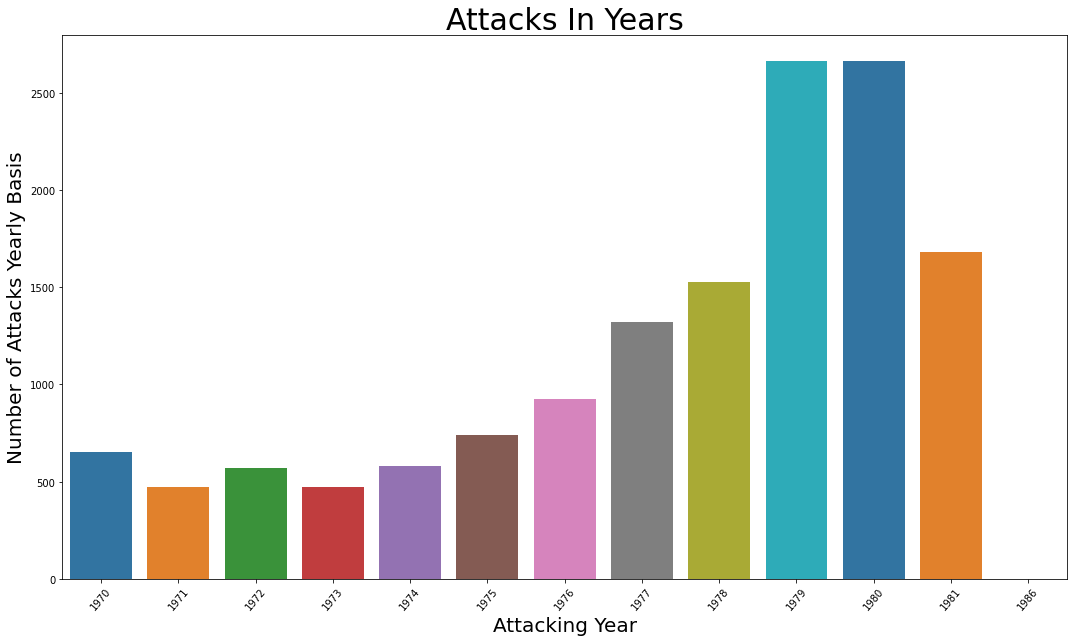

In [17]:
year = data['Year'].unique()
years_count = data['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = year, y = years_count,
                       palette = "tab10")
plt.xticks(rotation = 50)
plt.xlabel('Attacking Year',fontsize=20)
plt.ylabel('Number of Attacks Yearly Basis',fontsize=20)
plt.title('Attacks In Years',fontsize=30)
plt.show()




In [18]:
attack = data.Country.value_counts()[:10]
attack


United Kingdom    1861
United States     1587
El Salvador       1585
Italy             1181
Spain             1175
Colombia           659
Guatemala          632
France             612
Turkey             585
Nicaragua          345
Name: Country, dtype: int64

In [19]:
data.Group.value_counts()[1:10]


Irish Republican Army (IRA)                         1183
Basque Fatherland and Freedom (ETA)                  612
Farabundo Marti National Liberation Front (FMLN)     272
Palestinians                                         265
Protestant extremists                                206
Red Brigades                                         200
Sandinista National Liberation Front (FSLN)          197
Revolutionary Armed Forces of Colombia (FARC)        175
Ulster Volunteer Force (UVF)                         175
Name: Group, dtype: int64

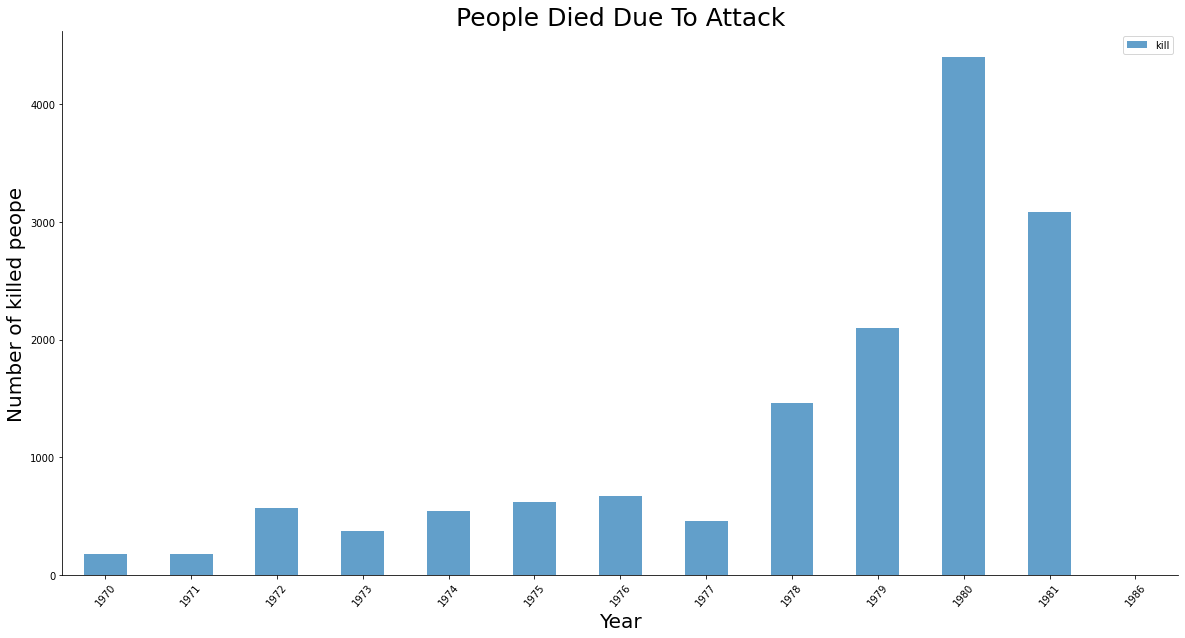

In [20]:
df = data[['Year','kill']].groupby(['Year']).sum()
fig, ax4 = plt.subplots(figsize=(20,10))
df.plot(kind='bar',alpha=0.7,ax=ax4)
plt.xticks(rotation = 50)
plt.title("People Died Due To Attack",fontsize=25)
plt.ylabel("Number of killed peope",fontsize=20)
plt.xlabel('Year',fontsize=20)
top_side = ax4.spines["top"]
top_side.set_visible(False)
right_side = ax4.spines["right"]
right_side.set_visible(False)


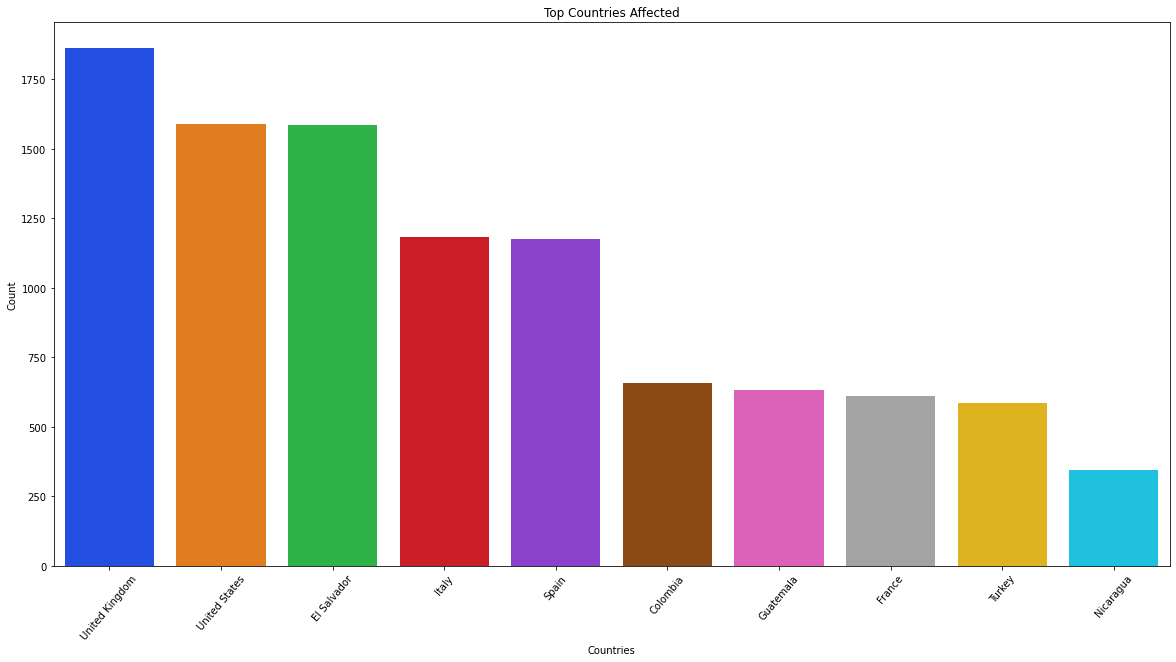

In [21]:
plt.subplots(figsize=(20,10))
sns.barplot(data['Country'].value_counts()[:10].index,data['Country'].value_counts()[:10].values,palette='bright')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation = 50)
plt.show()




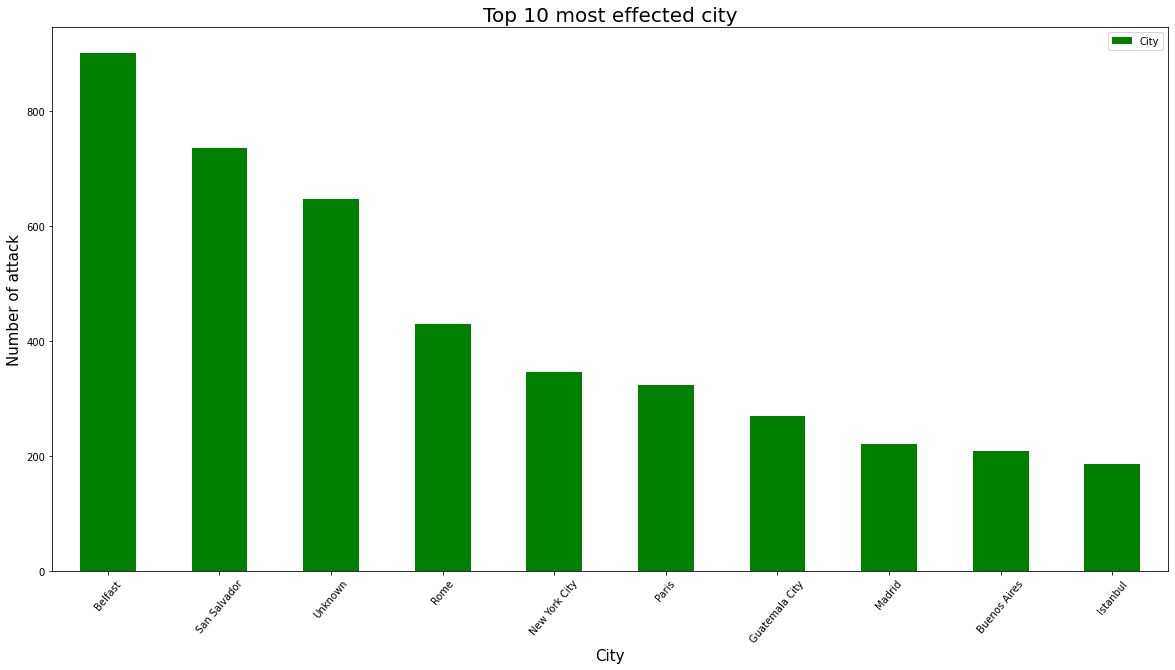

In [23]:
data['City'].value_counts().to_frame().sort_values('City',axis=0,ascending=False).head(10).plot(kind='bar',figsize=(20,10),color='green')
plt.xticks(rotation = 50)
plt.xlabel("City",fontsize=15)
plt.ylabel("Number of attack",fontsize=15)
plt.title("Top 10 most effected city",fontsize=20)
plt.show()


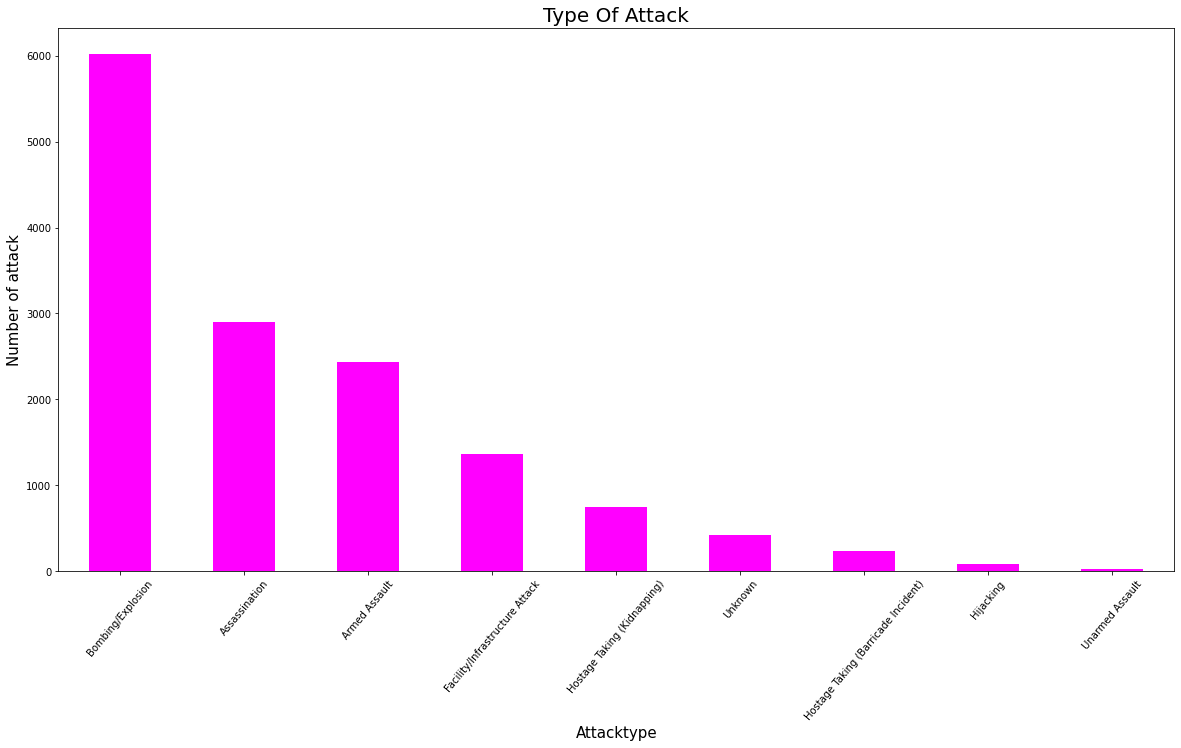

In [25]:
data['Attacktype'].value_counts().plot(kind='bar',figsize=(20,10),color='magenta')
plt.xticks(rotation = 50)
plt.xlabel("Attacktype",fontsize=15)
plt.ylabel("Number of attack",fontsize=15)
plt.title("Type Of Attack",fontsize=20)
plt.show()


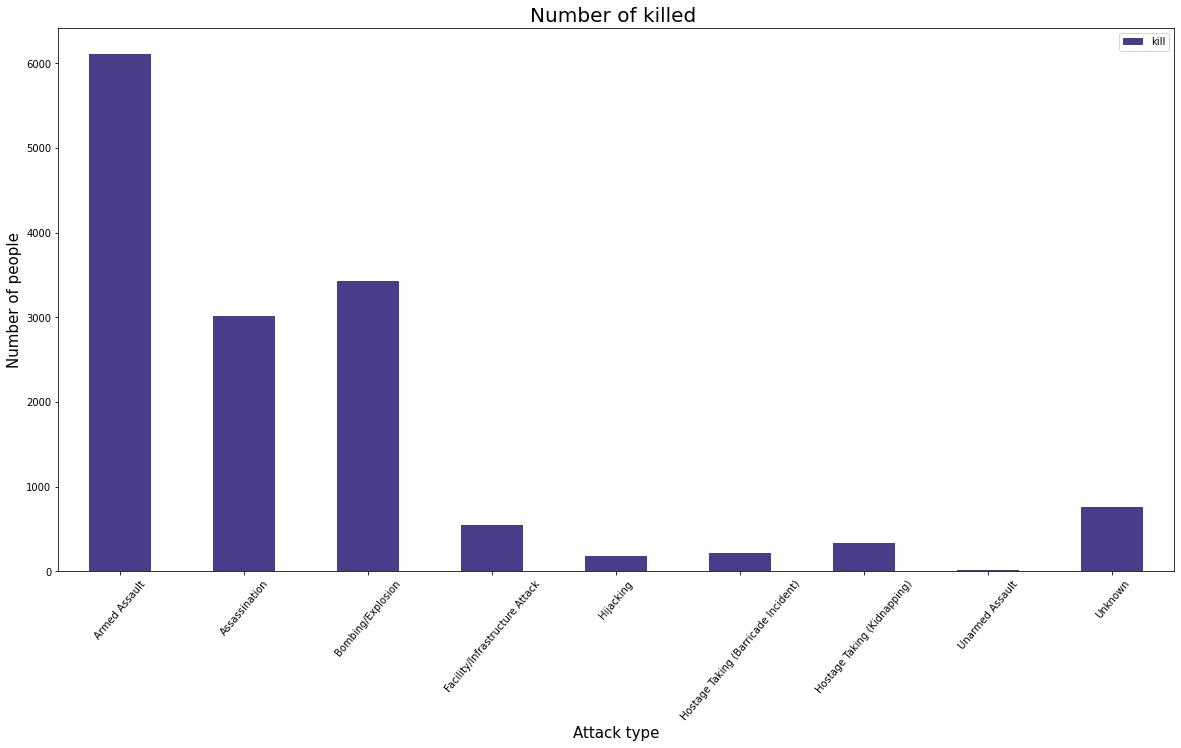

In [26]:
data[['Attacktype','kill']].groupby(["Attacktype"],axis=0).sum().plot(kind='bar',figsize=(20,10),color=['darkslateblue'])
plt.xticks(rotation=50)
plt.title("Number of killed ",fontsize=20)
plt.ylabel('Number of people',fontsize=15)
plt.xlabel('Attack type',fontsize=15)
plt.show()


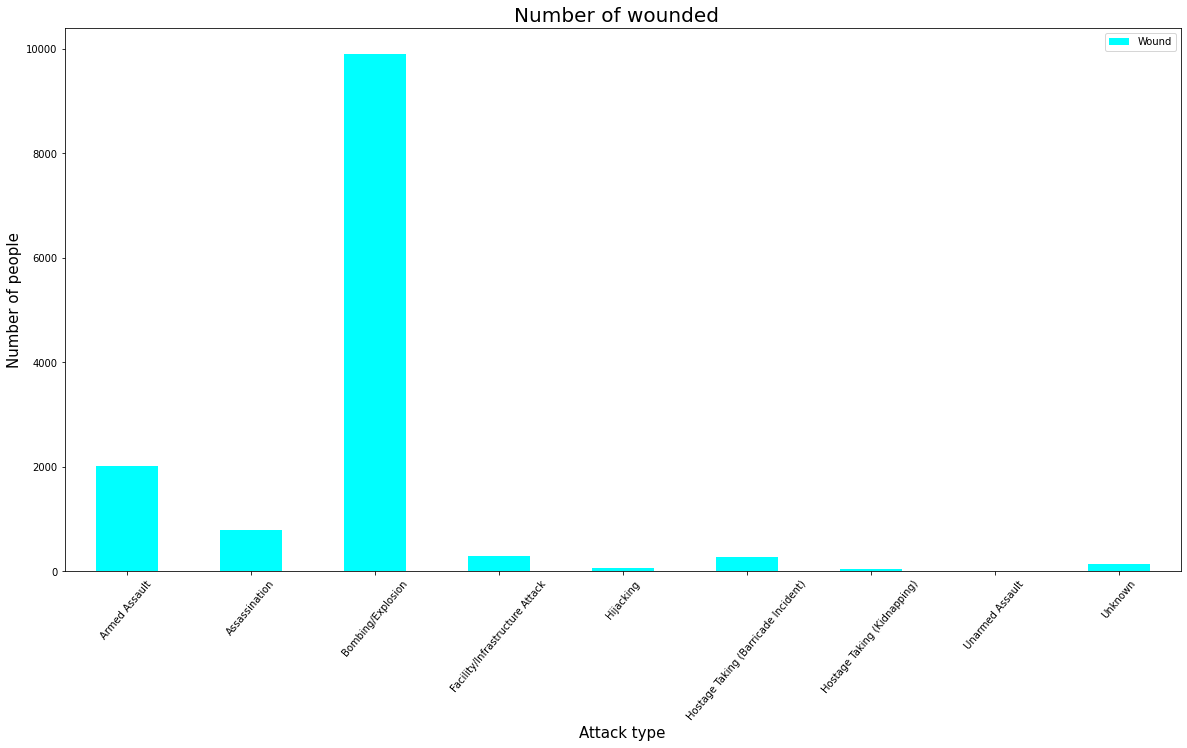

In [27]:
data[['Attacktype','Wound']].groupby(["Attacktype"],axis=0).sum().plot(kind='bar',figsize=(20,10),color=['cyan'])
plt.xticks(rotation=50)
plt.title("Number of wounded  ",fontsize=20)
plt.ylabel('Number of people',fontsize=15)
plt.xlabel('Attack type',fontsize=15)
plt.show()


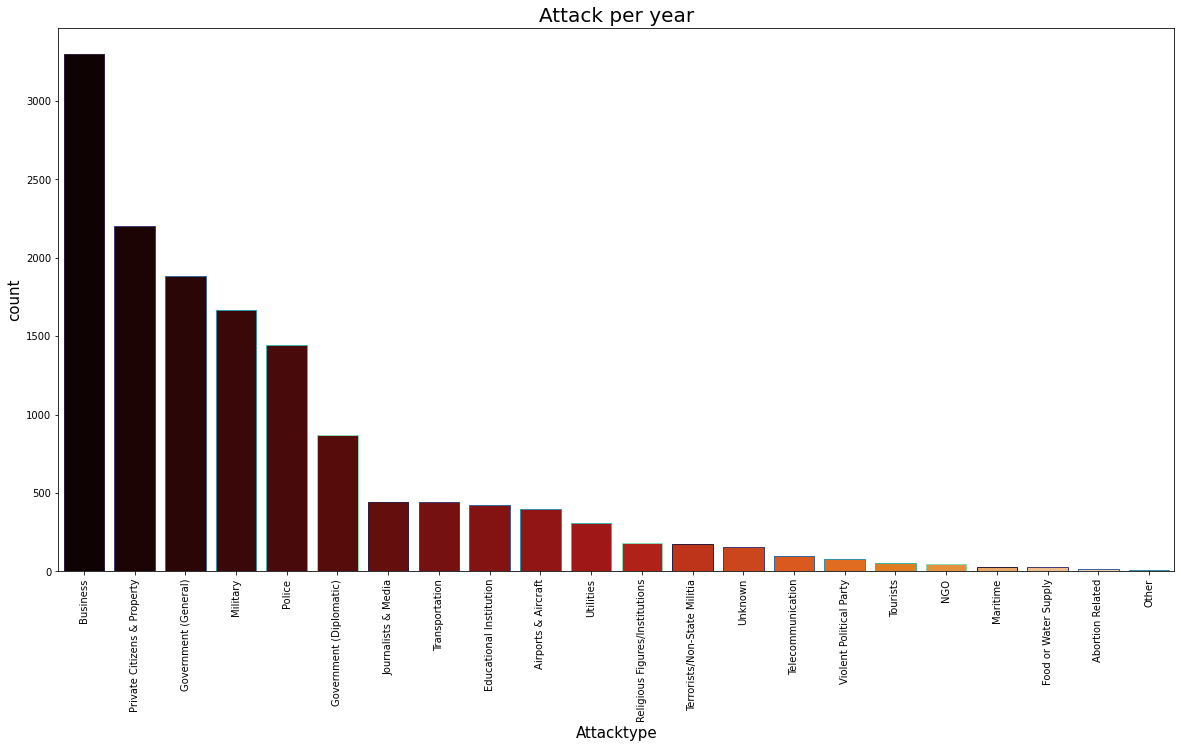

In [28]:
plt.subplots(figsize=(20,10))
sns.countplot(data["Targettype"],order=data['Targettype'].value_counts().index,palette="gist_heat",edgecolor=sns.color_palette("mako"));
plt.xticks(rotation=90)
plt.xlabel("Attacktype",fontsize=15)
plt.ylabel("count",fontsize=15)
plt.title("Attack per year",fontsize=20)
plt.show()


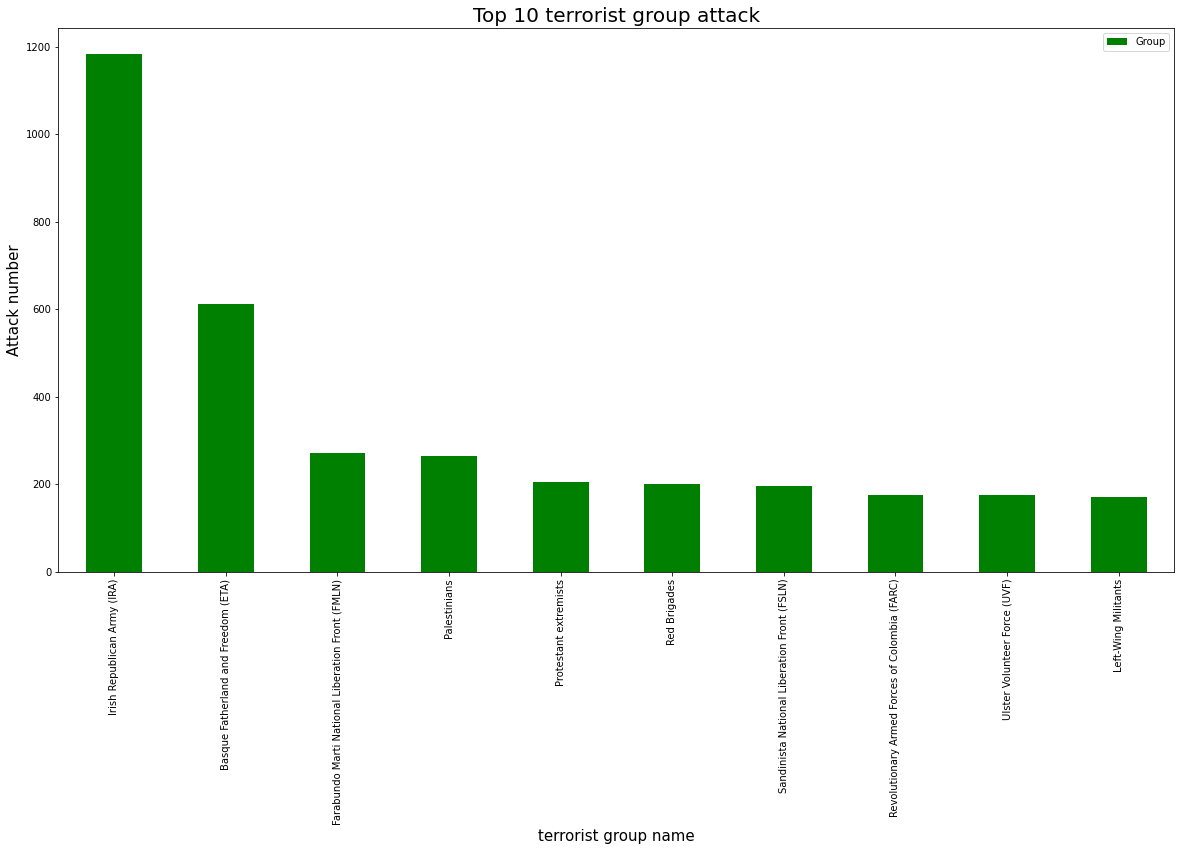

In [29]:
data['Group'].value_counts().to_frame().drop('Unknown').head(10).plot(kind='bar',color='green',figsize=(20,10))
plt.title("Top 10 terrorist group attack",fontsize=20)
plt.xlabel("terrorist group name",fontsize=15)
plt.ylabel("Attack number",fontsize=15)
plt.ylabel("Attack number",fontsize=15)
plt.show()


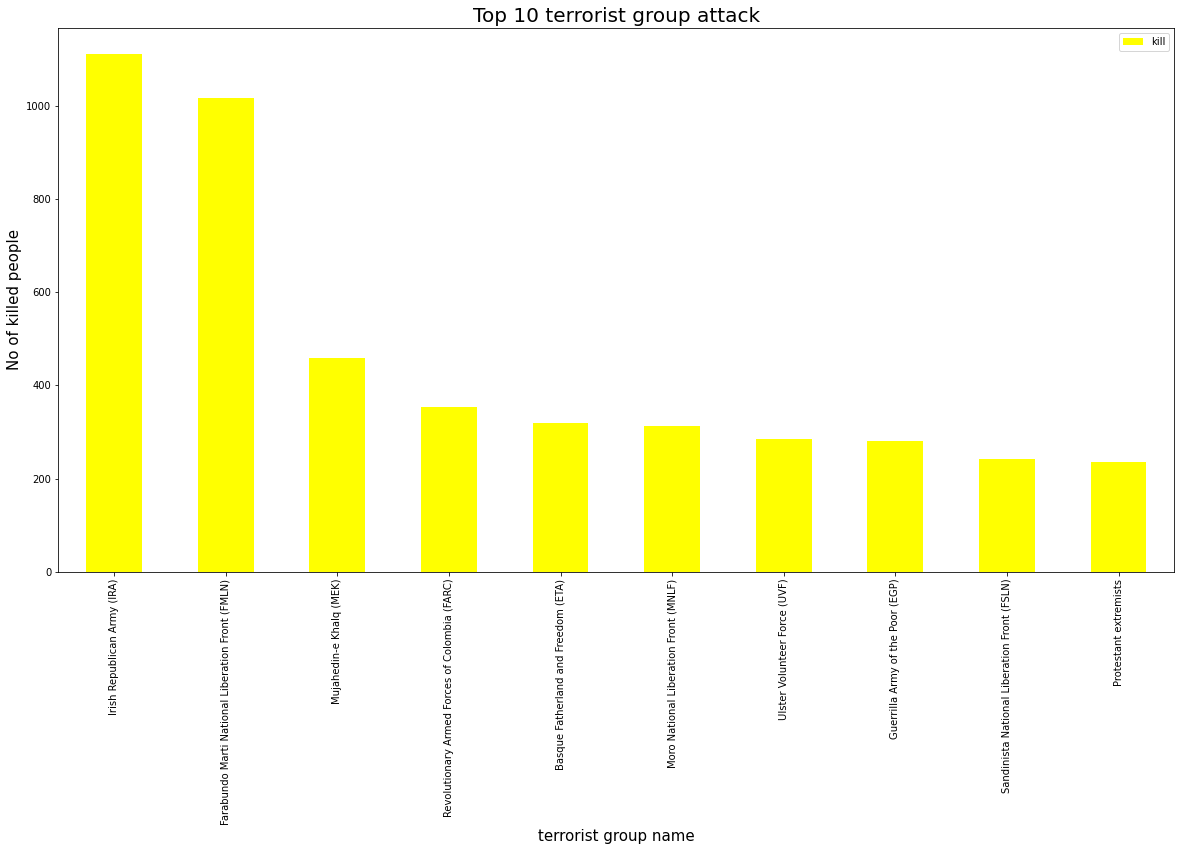

In [30]:
data[['Group','kill']].groupby(['Group'],axis=0).sum().drop('Unknown').sort_values('kill',ascending=False).head(10).plot(kind='bar',color='yellow',figsize=(20,10))
plt.title("Top 10 terrorist group attack",fontsize=20)
plt.xlabel("terrorist group name",fontsize=15)
plt.ylabel("No of killed people",fontsize=15)
plt.show()


In [31]:
df=data[['Group','Country','kill']]
df=df.groupby(['Group','Country'],axis=0).sum().sort_values('kill',ascending=False).drop('Unknown').reset_index().head(10)
df


,Group,Country,kill
0,Irish Republican Army (IRA),United Kingdom,1074.0
1,Farabundo Marti National Liberation Front (FMLN),El Salvador,1015.0
2,Mujahedin-e Khalq (MEK),Iran,458.0
3,Revolutionary Armed Forces of Colombia (FARC),Colombia,353.0
4,Basque Fatherland and Freedom (ETA),Spain,317.0
5,Moro National Liberation Front (MNLF),Philippines,312.0
6,Guerrilla Army of the Poor (EGP),Guatemala,281.0
7,Ulster Volunteer Force (UVF),United Kingdom,249.0
8,Sandinista National Liberation Front (FSLN),Nicaragua,238.0
9,Protestant extremists,United Kingdom,232.0


In [32]:
kill = data.loc[:,'kill']
print('Number of people killed by terror attack:', int(sum(kill.dropna())))


Number of people killed by terror attack: 14609


In [33]:
typeKill = data.pivot_table(columns='Attacktype', values='kill', aggfunc='sum')
typeKill


Attacktype,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
kill,6112.0,3010.0,3430.0,552.0,184.0,212.0,331.0,17.0,761.0


In [34]:
countryKill = data.pivot_table(columns='Country', values='kill', aggfunc='sum')
countryKill


Country,Afghanistan,Albania,Algeria,Andorra,Angola,Argentina,Australia,Austria,Bahamas,Bahrain,...,Uruguay,Vatican City,Venezuela,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yugoslavia,Zaire,Zambia,Zimbabwe
kill,53.0,0.0,0.0,0.0,19.0,328.0,5.0,12.0,0.0,0.0,...,4.0,0.0,5.0,46.0,63.0,0.0,2.0,1.0,5.0,26.0


Conclusion and Results :

